In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from src.features.selectors import xgb_feature_importance_selector
from sklearn.model_selection import train_test_split
from src.models.statistical import ArimaModel
from src.models.statistical import SarimaModel
from src.models.statistical import ProphetModel

C:\Users\zahid\ProgrammingForDataEngineering\learning-from-data-kilowizards\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("merged_istanbul_df.csv")

feature_importances = xgb_feature_importance_selector(df, target_col='Smf')

print(feature_importances)

             Feature  Importance
28               Ptf    0.800203
11     Arzislemhacmi    0.068051
33          Smfdolar    0.058705
34           Smfeuro    0.022158
5      Maxalisfiyati    0.017935
..               ...         ...
24  Gerceklesennafta    0.000000
25    Gerceklesenlng    0.000000
43               pod    0.000000
46   revision_status    0.000000
53     timestamp_utc    0.000000

[61 rows x 2 columns]


## ARIMA Test

In [3]:
data = df[['Ptf', 'Smf']].dropna()
target_series = data['Smf']

train_series, test_series = train_test_split(target_series, test_size=0.2, shuffle=False)

arima_order = (1, 1, 1)

arima_model = ArimaModel(train_series, order=arima_order).fit(X=target_series)

forecast_steps = min(len(test_series), 10)
forecast = arima_model.forecast(steps=forecast_steps)

print("Prediction:", forecast)
print("Actual Values:", test_series[:forecast_steps].values)

Prediction: 40796    2481.602004
40797    2389.044758
40798    2316.688434
40799    2260.124114
40800    2215.905143
40801    2181.337107
40802    2154.313658
40803    2133.188165
40804    2116.673380
40805    2103.763001
Name: predicted_mean, dtype: float64
Actual Values: [4180.   3499.9  3930.88 3000.   3800.01 3159.99 4000.   3850.   2999.99
 2750.01]


Mean Squared Error (MSE): 1829061.9931509246

**Tahmin ve Gerçek Değerlerin Görselleştirilmesi**


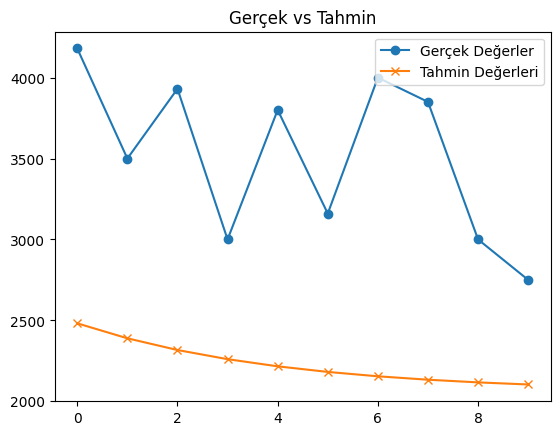

In [4]:
mse = mean_squared_error(test_series[:len(forecast)], forecast)
print("Mean Squared Error (MSE):", mse)

print("\n**Tahmin ve Gerçek Değerlerin Görselleştirilmesi**")
plt.plot(test_series[:len(forecast)].values, label="Gerçek Değerler", marker='o')
plt.plot(forecast.values, label="Tahmin Değerleri", marker='x')
plt.legend()
plt.title("Gerçek vs Tahmin")
plt.show()

## SARIMA Test

In [5]:
data = df[['Ptf', 'Smf']].dropna()
target_series = data['Smf']

train_series, test_series = train_test_split(target_series, test_size=0.2, shuffle=False)

arima_order = (1, 1, 1)
seasonal_order = (1, 1, 0, 12)

sarima_model = SarimaModel(train_series, order=arima_order, seasonal_order=seasonal_order).fit(X=target_series)

forecast_steps = min(len(test_series), 10)
forecast = sarima_model.forecast(steps=forecast_steps)

print("Prediction:", forecast)
print("Actual Values:", test_series[:forecast_steps].values)

Prediction: 40796    2309.052672
40797    2047.299260
40798    1928.602266
40799    1941.934657
40800    2186.828133
40801    2240.491993
40802    2323.925194
40803    2355.040793
40804    2275.043802
40805    2268.019394
Name: predicted_mean, dtype: float64
Actual Values: [4180.   3499.9  3930.88 3000.   3800.01 3159.99 4000.   3850.   2999.99
 2750.01]


Mean Squared Error (MSE): 1998893.5248212288

**Tahmin ve Gerçek Değerlerin Görselleştirilmesi**


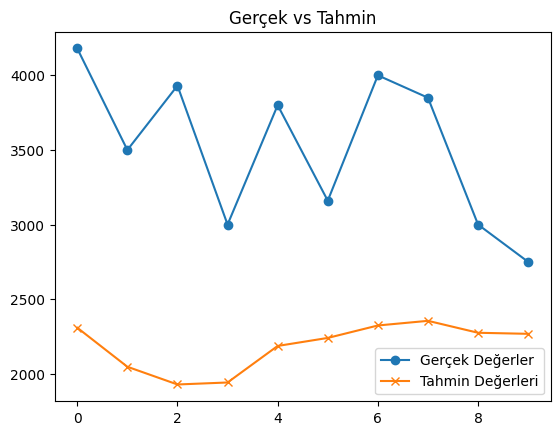

In [6]:
mse = mean_squared_error(test_series[:len(forecast)], forecast)
print("Mean Squared Error (MSE):", mse)

print("\n**Tahmin ve Gerçek Değerlerin Görselleştirilmesi**")
plt.plot(test_series[:len(forecast)].values, label="Gerçek Değerler", marker='o')
plt.plot(forecast.values, label="Tahmin Değerleri", marker='x')
plt.legend()
plt.title("Gerçek vs Tahmin")
plt.show()

## Prophet Test

In [7]:
# 1. Örnek bir zaman serisi verisi oluşturma
data = df[['Tarih', 'Smf']].dropna()
data['Tarih'] = pd.to_datetime(data['Tarih'])
data = data.rename(columns={'Tarih': 'ds', 'Smf': 'y'})

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

prophet_model = ProphetModel(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(train_data)

forecast_steps = len(test_data)
future = prophet_model.predict(steps=forecast_steps)

print("Tahmin Edilen Değerler:\n", future)
print("\nGerçek Değerler:\n", test_data['y'].values)

prophet_model.save('prophet_model.pkl')
reloaded_model = ProphetModel.load('prophet_model.pkl')

reloaded_forecast = reloaded_model.predict(steps=forecast_steps)
print("\nYeniden Yüklenen Model Tahminleri:\n", reloaded_forecast)


02:13:19 - cmdstanpy - INFO - Chain [1] done processing


Tahmin Edilen Değerler:
                        ds         trend     yhat_lower     yhat_upper  \
0     2019-01-01 00:00:00   -128.443680    -143.412587     602.920661   
1     2019-01-01 01:00:00   -128.237025    -176.385899     620.902132   
2     2019-01-01 02:00:00   -128.030370    -158.189991     643.891490   
3     2019-01-01 03:00:00   -127.823714    -116.904765     618.938408   
4     2019-01-01 04:00:00   -127.617059    -131.579357     627.947019   
...                   ...           ...            ...            ...   
40791 2045-01-19 19:00:00  98094.732671 -241021.846779  451473.956256   
40792 2045-01-20 19:00:00  98106.295937 -241305.200498  450930.924953   
40793 2045-01-21 19:00:00  98117.859202 -240968.933764  451329.037724   
40794 2045-01-22 19:00:00  98129.422467 -241829.913614  451250.520874   
40795 2045-01-23 19:00:00  98140.985732 -241244.905477  451747.318944   

         trend_lower    trend_upper  additive_terms  additive_terms_lower  \
0        -128.443680 